# imports

In [1]:
# vitals
import numpy as np
import pandas as pd

#sk learn 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# Part 0: loading and validating

In [2]:
#load in data from the csv's into dataframes 
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#Check the heads of train and test
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#check to see what data stands out in the train and test data
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_train.groupby(['Survived', 'Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [8]:
df_test.groupby('Sex').size()

Sex
female    152
male      266
dtype: int64

Text(0.5, 1.0, 'Overall Survival')

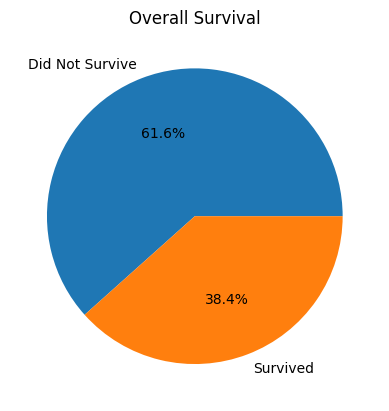

In [9]:
sub = df_train['Survived'].value_counts()
survival_rate = [sub[0]/len(df_train)*100,sub[1]/len(df_train)*100]

plt.pie(survival_rate,labels = ['Did Not Survive','Survived'], autopct='%1.1f%%')
plt.title('Overall Survival')

Text(0.5, 1.0, 'Survival of female')

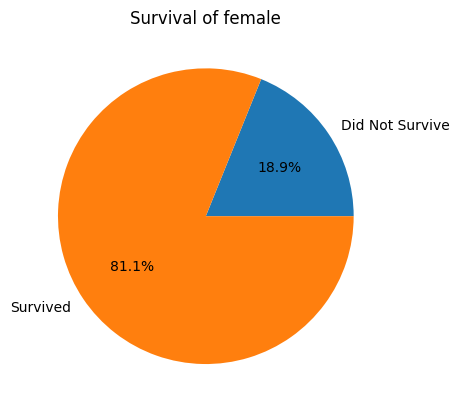

In [10]:
survived_male = len(df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)])/len(df_train[df_train['Sex'] == 'male'])*100
survived_female = len(df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)])/len(df_train[df_train['Sex'] == 'female'])*100
male = [survived_male,100-survived_male]
female = [survived_female,100-survived_female]

plt.pie(male,labels = ['Did Not Survive','Survived'], autopct='%1.1f%%')
plt.title('Survival of female')

Text(0.5, 1.0, 'Survival of male')

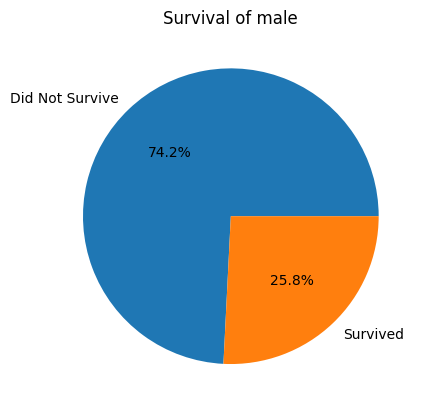

In [11]:
plt.pie(female,labels = ['Did Not Survive','Survived'], autopct='%1.1f%%')
plt.title('Survival of male')

In [12]:
len(df_train)

891

# Part 1: Training and Testing

In [13]:
# Convert sex into numeric value for the model, female 1 and male 0 
df_train['Sex'] = df_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df_test['Sex'] = df_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# get rid of the null values
df_train = df_train.dropna()
df_test = df_test.dropna()

In [14]:
# Drop unused rows, define x and y for both train and test 
X_train = df_train.drop(['Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
Y_train = df_train['Survived']
X_test  = df_test.drop(['Name', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((183, 4), (183,), (87, 4))

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.23

In [16]:
predicted = knn.predict(X=X_test)
expected = Y_pred
print(predicted[:20])
print(expected[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
# Calculating the overall acuracy of the model via the test set
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print("Model accuracy:%.2f%%" %(knn.score(X_test,Y_pred)*100))

Model accuracy:100.00%


In [18]:
# doing some splitting to get a better idea of the accuracy of the model
# Using the cross_val_score function to calculate the accuracy of the model using 10-fold cross-validation
kfold = KFold(n_splits=12, random_state=20, shuffle=True)
# Scores is set to having estimator knn (our model), and the data and target values from the digits dataset, and the kfold object we created determinig the number of folds
scores = cross_val_score(estimator=knn, X=X_train, y=Y_train,
cv=kfold)
scores

array([0.6875    , 0.375     , 0.5625    , 0.66666667, 0.26666667,
       0.66666667, 0.66666667, 0.66666667, 0.93333333, 0.6       ,
       0.53333333, 0.46666667])

In [22]:
# Loop to see our performance by changing the radius (or the k value) of our model. 
Y_pred_split = []
for k in range(1, 20, 2):
    kfold = KFold(n_splits=12, random_state=20, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}')
    knn.fit(X_train, Y_train)
    Y_pred_split.append(knn.predict(X_test))


k=1 ; mean accuracy=61.25%; standard deviation=14.70%
k=3 ; mean accuracy=59.10%; standard deviation=16.35%
k=5 ; mean accuracy=62.36%; standard deviation=13.20%
k=7 ; mean accuracy=64.48%; standard deviation=12.67%
k=9 ; mean accuracy=66.60%; standard deviation=12.81%
k=11; mean accuracy=68.23%; standard deviation=12.86%
k=13; mean accuracy=68.33%; standard deviation=9.54%
k=15; mean accuracy=68.85%; standard deviation=10.14%
k=17; mean accuracy=67.22%; standard deviation=10.09%
k=19; mean accuracy=66.11%; standard deviation=9.33%


In [23]:
# export the data to a csv file
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred})
submission.to_csv('submission.csv', index=False)